### Content

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### Load downloaded dataset

In [2]:
diamonds = pd.read_csv('diamonds_renamed_cols.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,lenght_x,width_y,depth_z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Basic data features

In [3]:
diamonds.shape

(53940, 10)

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat       53940 non-null float64
cut         53940 non-null object
color       53940 non-null object
clarity     53940 non-null object
depth       53940 non-null float64
table       53940 non-null float64
price       53940 non-null int64
lenght_x    53940 non-null float64
width_y     53940 non-null float64
depth_z     53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
diamonds.describe()

,carat,depth,table,price,lenght_x,width_y,depth_z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Lenght_x, width_y and depth_z have minimum of 0 which means that there are rows with 0 values.

### Check for rows with 0 values

In [6]:
print(f"Number of rows with lenght_x == 0: {(diamonds.lenght_x==0).sum()}")
print(f"Number of rows with width_y == 0: {(diamonds.width_y==0).sum()}")
print(f"Number of rows with depth_z == 0: {(diamonds.depth_z==0).sum()}")
print(f"Number of rows with depth == 0: {(diamonds.depth==0).sum()}")

Number of rows with lenght_x == 0: 8
Number of rows with width_y == 0: 7
Number of rows with depth_z == 0: 20
Number of rows with depth == 0: 0


#### Remove rows with 0 values

In [7]:
diamonds[['lenght_x', 'width_y', 'depth_z']] = diamonds[['lenght_x', 'width_y', 'depth_z']].replace(0, np.NaN)

In [8]:
diamonds.dropna(inplace=True)

In [9]:
diamonds.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
lenght_x    0
width_y     0
depth_z     0
dtype: int64

In [10]:
    diamonds.to_csv('diamonds_renamed_cols_removed_nulls.csv', index=False)

### Value counts for categorical data

In [11]:
diamonds_text = ['cut', 'color', 'clarity']

In [12]:
for dt in diamonds_text:
    print(f'\nCategory: {dt} \n\n {diamonds[dt].value_counts()}')


Category: cut 

 Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

Category: color 

 G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

Category: clarity 

 SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64



Median analysis by cut


            price
cut              
Fair       3282.0
Good       3050.5
Ideal      1809.5
Premium    3182.0
Very Good  2647.0

Median analysis by color


        price
color        
D      1836.5
E      1739.0
F      2343.5
G      2240.0
H      3453.5
I      3730.0
J      4234.0

Median analysis by clarity


          price
clarity        
I1       3346.0
IF       1080.0
SI1      2822.0
SI2      4072.0
VS1      2005.0
VS2      2052.0
VVS1     1092.5
VVS2     1311.0


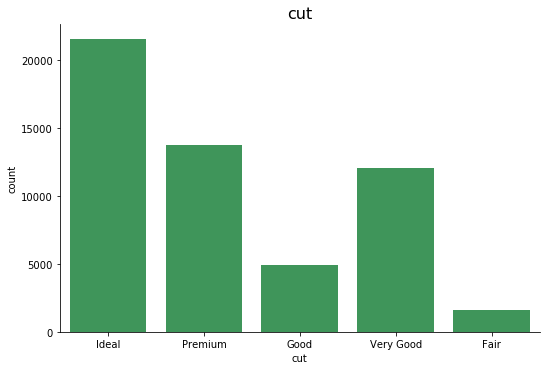

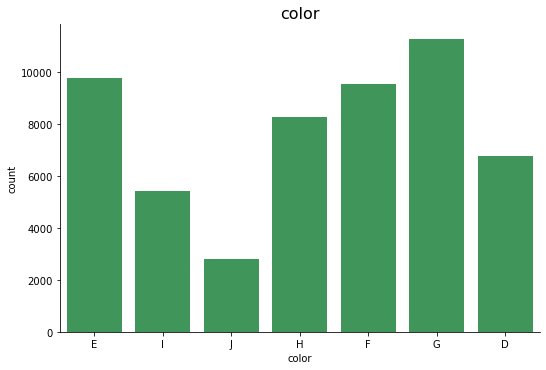

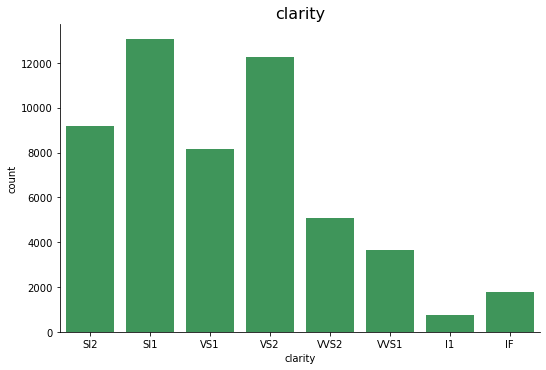

In [13]:
for dt in diamonds_text:
    sns.catplot(dt, data=diamonds, kind='count', color='#31a354', aspect=1.5)
    plt.title(dt, fontdict={'fontsize': 16})
    
    print(f"\nMedian analysis by {dt}\n\n")
    print(diamonds[[dt, 'price']].groupby(dt).median())


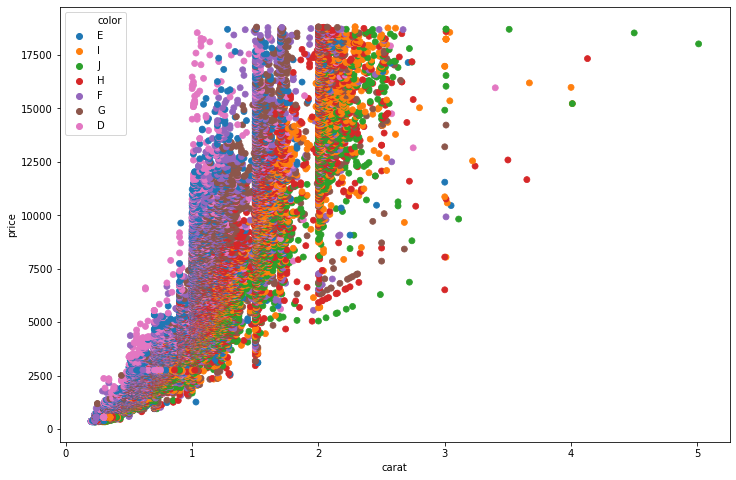

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(x='carat', y='price', hue='color', data=diamonds, edgecolor=None)


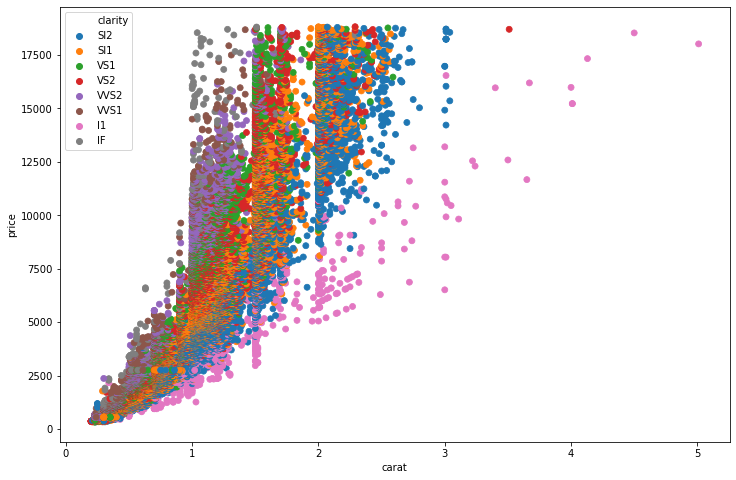

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(x='carat', y='price', hue='clarity', data=diamonds, edgecolor=None)


color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

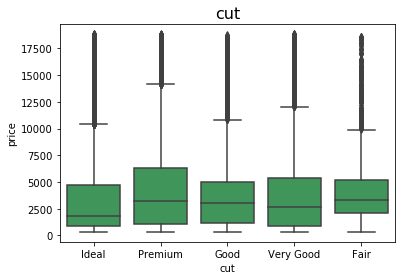

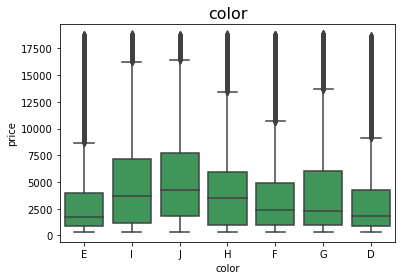

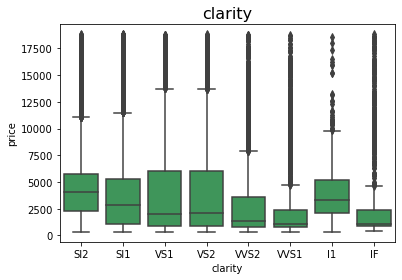

In [16]:
for dt in diamonds_text:
    plt.figure()
    sns.boxplot(x=dt, y='price', data=diamonds, color='#31a354')
    plt.title(dt, fontdict={'fontsize': 16})


1. Median price is the highest for the worst color (J)
2. Median price is the highest for the second worst clarity (SI2)
3. Medina price is the highest for the the worst cut (Fair)

In [17]:
num_cols = [['carat', 'depth', 'table', 'price',
       'lenght_x', 'width_y', 'depth_z']]

### Histograms

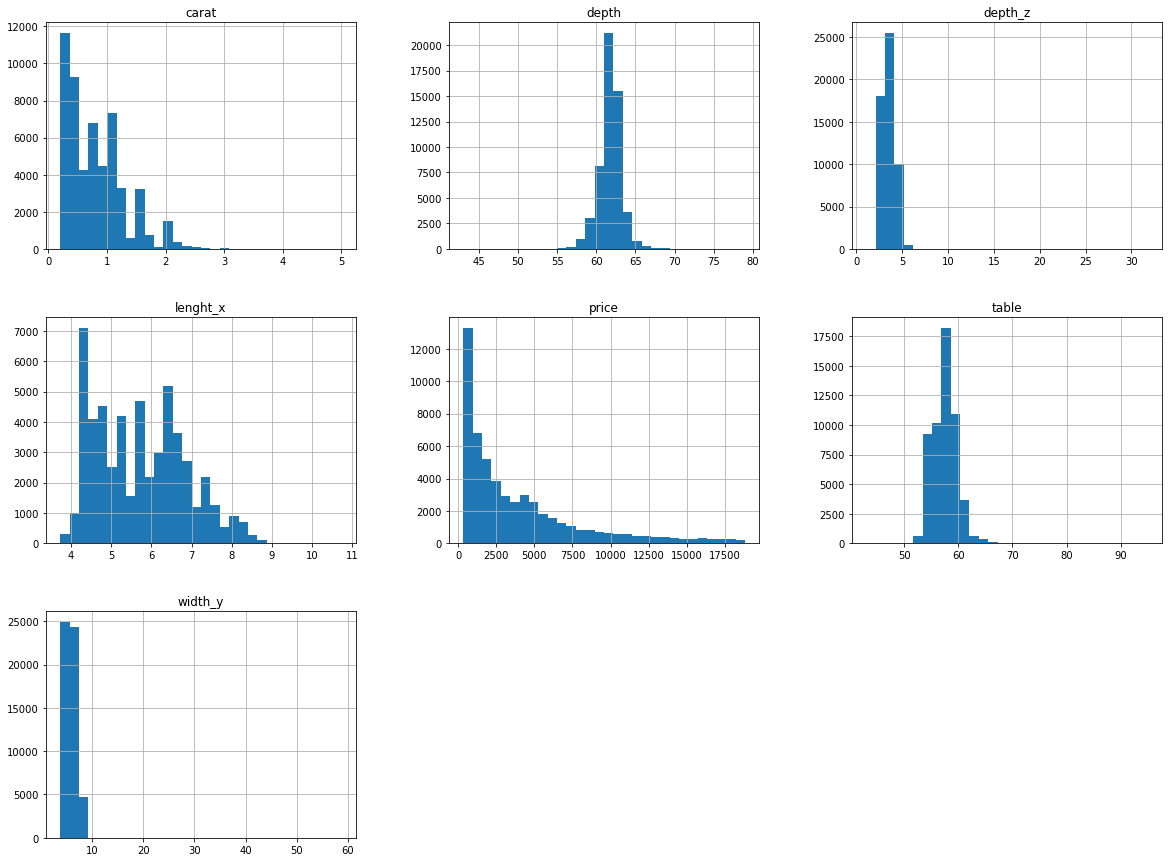

In [18]:
%matplotlib inline
diamonds.hist(bins=30, figsize=(20,15))
plt.show()

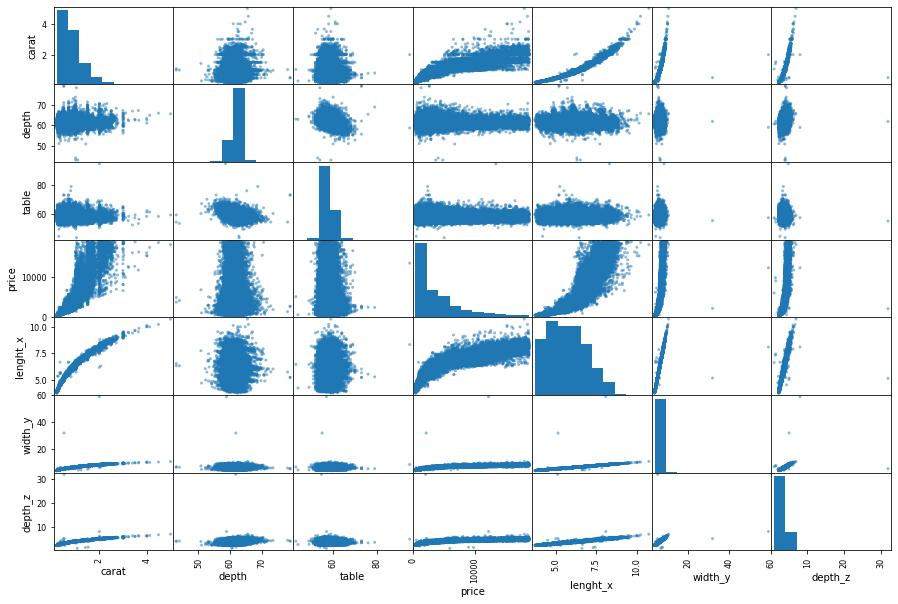

In [19]:
attributes = ['carat', 'depth', 'table', 'price', 'lenght_x', 'width_y', 'depth_z']
scatter_matrix(diamonds[attributes], figsize=(15,10))
plt.show()

### Checking correlations

In [20]:
corr_matrix = diamonds.corr()

In [21]:
corr_matrix

,carat,depth,table,price,lenght_x,width_y,depth_z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
lenght_x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
width_y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
depth_z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


In [22]:
corr_matrix['price'].sort_values(ascending=False)

price       1.000000
carat       0.921592
lenght_x    0.887231
depth_z     0.868206
width_y     0.867864
table       0.127245
depth      -0.010729
Name: price, dtype: float64

In [23]:
corr_matrix['carat'].sort_values(ascending=False)

carat       1.000000
lenght_x    0.977779
depth_z     0.961048
width_y     0.953991
price       0.921592
table       0.181646
depth       0.028259
Name: carat, dtype: float64

1. Price is highly correlated with carat, lenght_x, depth_z and width_y. 
2. Table and depth are not highly correlated with price. I will remove them before runing models.